<a href="https://colab.research.google.com/github/Nurhanifah99/PCVK_GENAP_2021/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Gamma Correction pada citra 
-----------------------------
Masukan nilai Gamma: 3


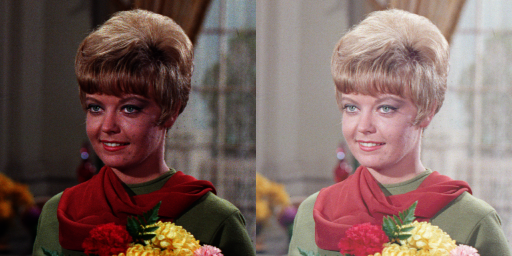

In [2]:
import cv2 as cv
import numpy as np
import math
from google.colab.patches import cv2_imshow

img = cv.imread("/content/drive/MyDrive/PCVK_GENAP2021/Images/female.tiff")

print(' Gamma Correction pada citra ')
print('-----------------------------')

try:
  gamma = int(input('Masukan nilai Gamma: '))
  gamma_fix = gamma / 10
  # print(gamma_fix)
  gamma_corrected = np.array(255*(img / 255) ** 0.3, dtype = 'uint8')
  fix = cv.hconcat((img, gamma_corrected))
  cv2_imshow(fix)
except ValueError:
  print('Error, not a number')

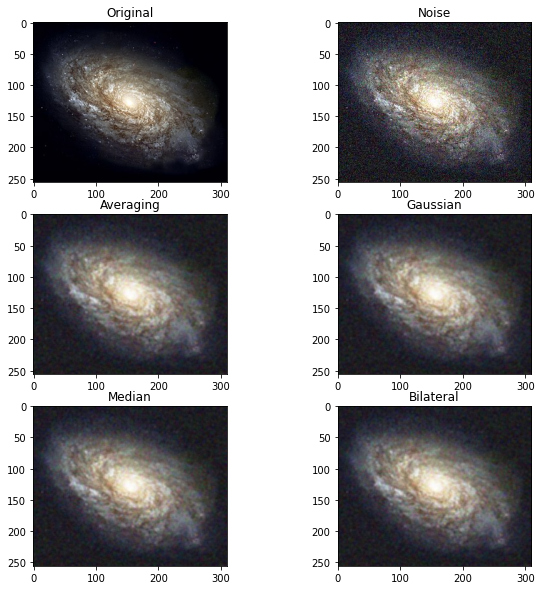

In [3]:
import glob
import matplotlib.pyplot as plt

img_galaxy = cv.cvtColor(cv.imread("/content/drive/MyDrive/PCVK_GENAP2021/Images/galaxy.jpg"), cv.COLOR_BGR2RGB)
cv_img = []
for img in glob.glob("/content/drive/MyDrive/PCVK_GENAP2021/Images/noises/*.jpg"):
  n = cv.cvtColor(cv.imread(img), cv.COLOR_BGR2RGB)
  cv_img.append(n)

averaging = cv.blur(cv_img[0], (4,4))  
gaussian = cv.GaussianBlur(cv_img[0], (5,5), 0)
median = cv.medianBlur(cv_img[0], 7)
bilateral = cv.bilateralFilter(cv_img[0], 5, 150, 150)

f = plt.figure(figsize=(10,10))

f.add_subplot(3,2, 1)
plt.title('Original')
plt.imshow(img_galaxy)

f.add_subplot(3,2, 2)
plt.title('Noise')
plt.imshow(cv_img[0])

f.add_subplot(3,2, 3)
plt.title('Averaging')
plt.imshow(averaging)

f.add_subplot(3,2, 4)
plt.title('Gaussian')
plt.imshow(averaging)

f.add_subplot(3,2, 5)
plt.title('Median')
plt.imshow(averaging)

f.add_subplot(3,2, 6)
plt.title('Bilateral')
plt.imshow(averaging)

plt.show(block=True)

In [5]:
import cv2 as cv
import glob
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

img_galaxy = cv.cvtColor(cv.imread("/content/drive/MyDrive/PCVK_GENAP2021/Images/galaxy.jpg"), cv.COLOR_BGR2RGB)

cv_img = []
for img in glob.glob("/content/drive/MyDrive/PCVK_GENAP2021/Images/noises/*.jpg"):
  n = cv.cvtColor(cv.imread(img), cv.COLOR_BGR2RGB)
  cv_img.append(n) 

cv_img_5 = []
for no in range(1,6):
  cv_img_5.append(cv_img[no])

cv_img_30 = []
for no in range(1,31):
  cv_img_30.append(cv_img[no])

cv_img_60 = []
for no in range(1,61):
  cv_img_60.append(cv_img[no])

cv_img_80 = []
for no in range(1,81):
  cv_img_80.append(cv_img[no])

ims5 = np.array([np.array(im) for im in cv_img_5])
ims30 = np.array([np.array(im) for im in cv_img_30])
ims60 = np.array([np.array(im) for im in cv_img_60])
ims80 = np.array([np.array(im) for im in cv_img_80])
ims = np.array([np.array(im) for im in cv_img])

imave_5 = np.average(ims5,axis=0)
imave_30 = np.average(ims30,axis=0)
imave_60 = np.average(ims60,axis=0)
imave_80 = np.average(ims80,axis=0)
imave_100 = np.average(ims,axis=0)

result_5 = Image.fromarray(imave_5.astype('uint8'))
result_30 = Image.fromarray(imave_30.astype('uint8'))
result_60 = Image.fromarray(imave_60.astype('uint8'))
result_80 = Image.fromarray(imave_80.astype('uint8'))
result_100 = Image.fromarray(imave_100.astype('uint8'))

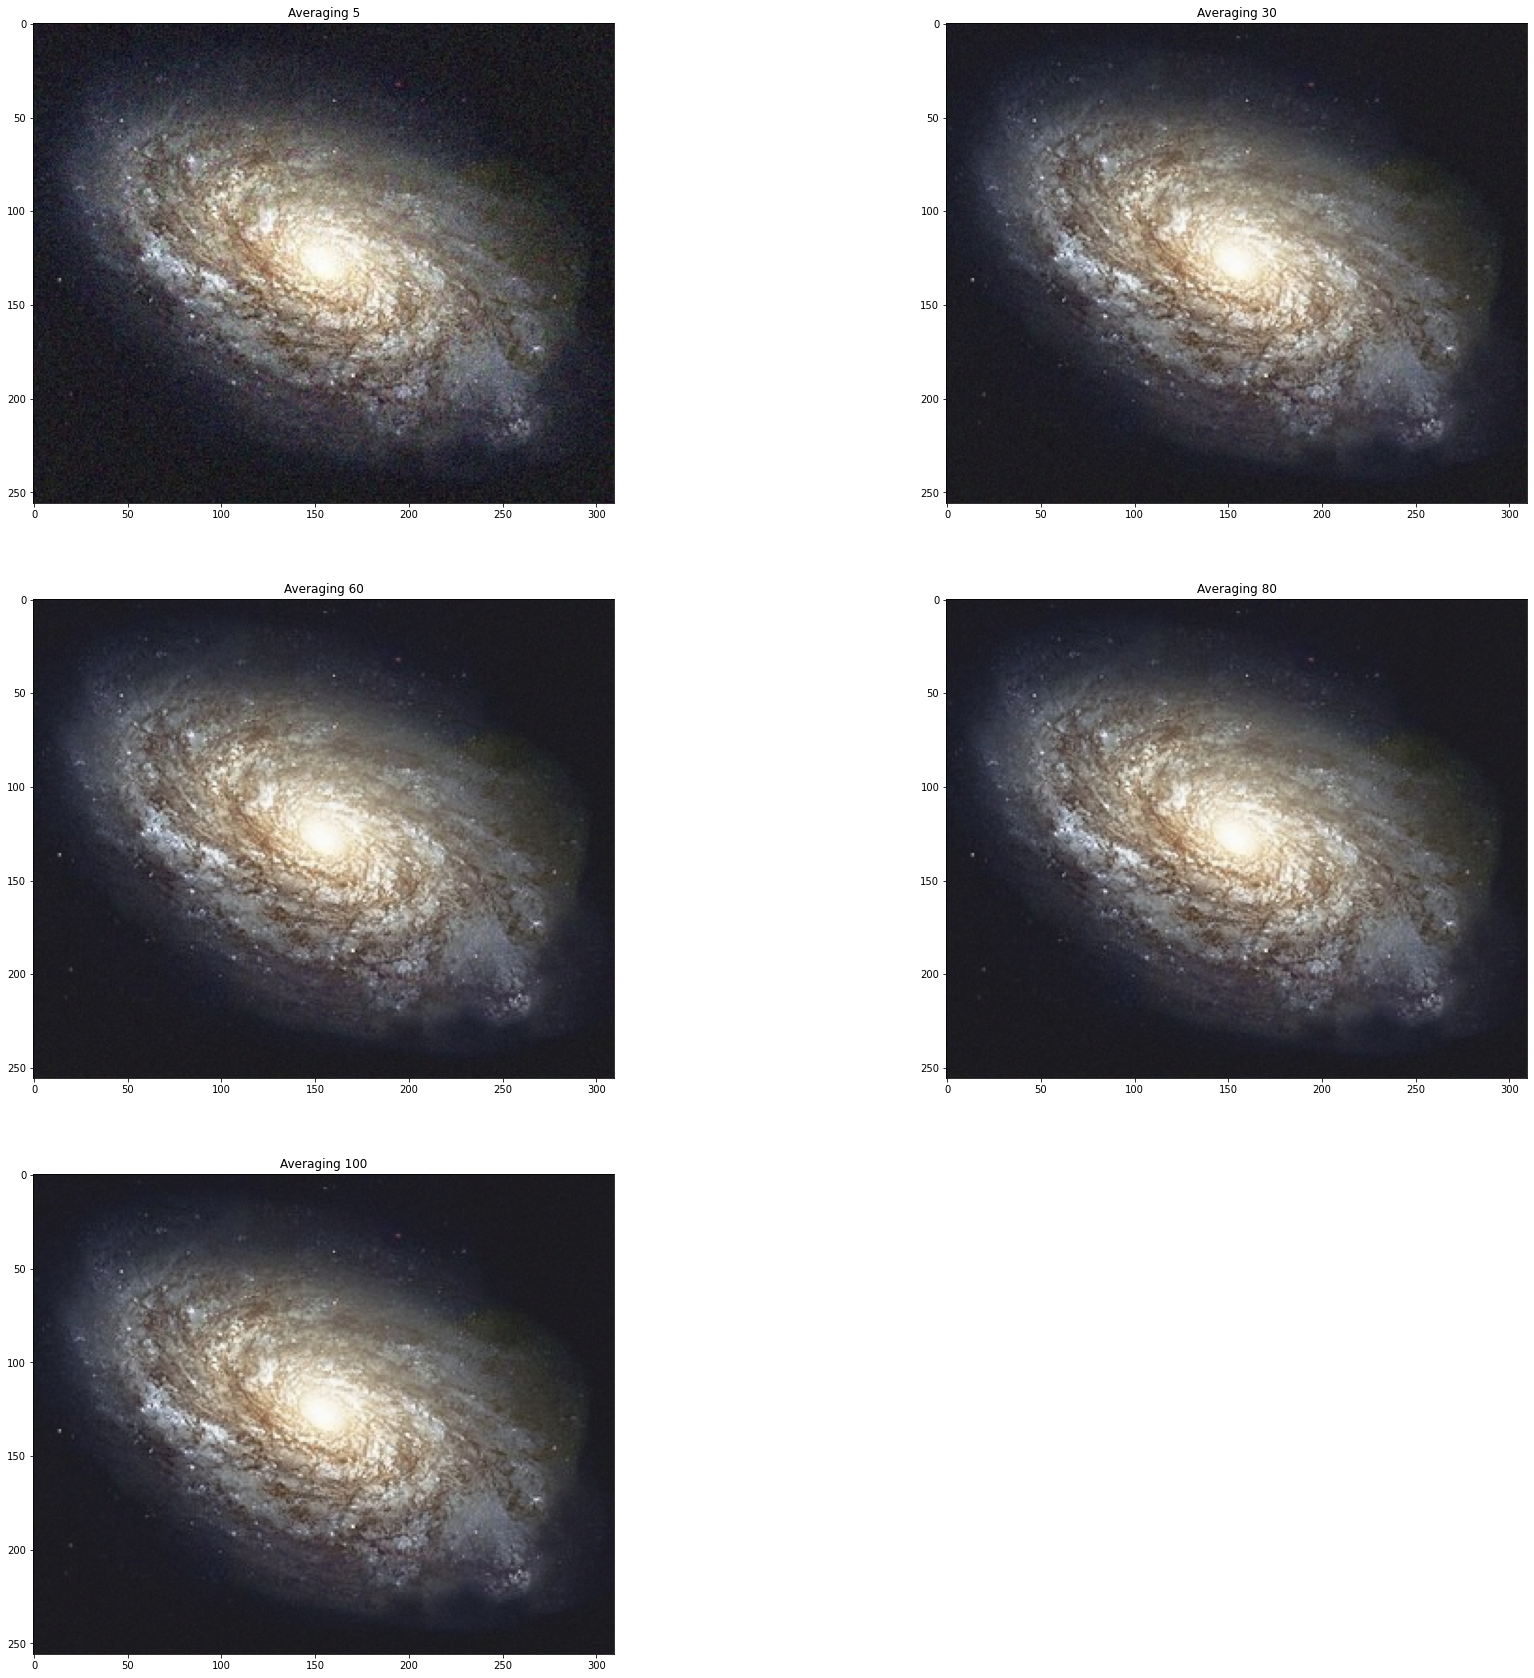

In [6]:
f = plt.figure(figsize=(30,30))

# f.add_subplot(1,2, 1)
# plt.title('Original')
# plt.imshow(img_galaxy)

# f.add_subplot(4,2, 2)
# plt.title('Noise')
# plt.imshow(cv_img[0])

f.add_subplot(3,2, 1)
plt.title('Averaging 5')
plt.imshow(result_5)

f.add_subplot(3,2, 2)
plt.title('Averaging 30')
plt.imshow(result_30)

f.add_subplot(3,2, 3)
plt.title('Averaging 60')
plt.imshow(result_60)

f.add_subplot(3,2, 4)
plt.title('Averaging 80')
plt.imshow(result_80)

f.add_subplot(3,2, 5)
plt.title('Averaging 100')
plt.imshow(result_100)

In [11]:
import numpy 
import math
import cv2
# original = cv2.imread("original.png")
# contrast = cv2.imread("photoshopped.png",1)
def psnr(img1, img2):
    mse = numpy.mean( (img1 - img2) ** 2 )
    if mse == 0:
      return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

d=psnr(img_galaxy,result_100)
print(d)

27.370931279516654


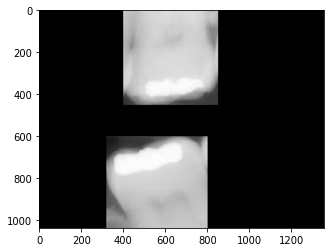

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img8 = cv.imread("/content/drive/MyDrive/PCVK_GENAP2021/Images/teeth.jpg")
# plt.imshow(img8)
mask = np.zeros(img8.shape, dtype=np.uint8)
mask = cv.rectangle(mask, (400,0), (850,450), (255,255,255), -1)
mask = cv.rectangle(mask, (320,600), (800,1036), (255,255,255), -1)

result = cv.bitwise_and(img8, mask)
plt.imshow(result)

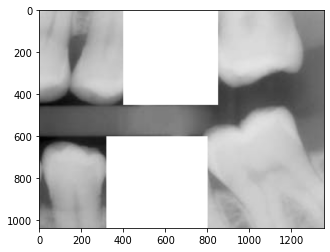

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

mask = np.zeros(img8.shape, dtype=np.uint8)
mask = cv.rectangle(mask, (400,0), (850,450), (255,255,255), -1)
mask = cv.rectangle(mask, (320,600), (800,1036), (255,255,255), -1)

result = cv.bitwise_or(img8, mask)
plt.imshow(result)

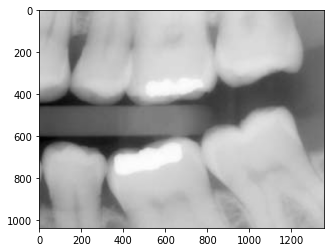

In [15]:
plt.imshow(img8)

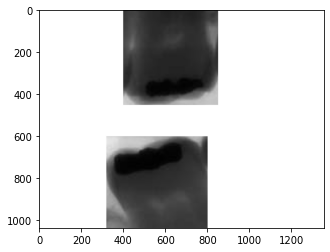

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img8 = cv.imread("/content/drive/MyDrive/PCVK_GENAP2021/Images/teeth.jpg")
# plt.imshow(img8)
mask = np.zeros(img8.shape, dtype=np.uint8)
mask = cv.rectangle(mask, (400,0), (850,450), (255,255,255), -1)
mask = cv.rectangle(mask, (320,600), (800,1036), (255,255,255), -1)

result = cv.bitwise_and(img8, mask)
result = cv.bitwise_not(result, mask)
plt.imshow(result)

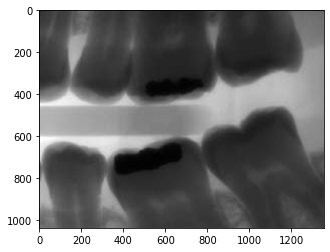

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

mask = np.zeros(img8.shape, dtype=np.uint8)
mask = cv.rectangle(mask, (400,0), (850,450), (255,255,255), -1)
mask = cv.rectangle(mask, (320,600), (800,1036), (255,255,255), -1)

result = cv.bitwise_not(img8, mask)
plt.imshow(result)

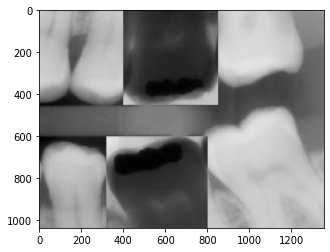

In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

mask = np.zeros(img8.shape, dtype=np.uint8)
mask = cv.rectangle(mask, (400,0), (850,450), (255,255,255), -1)
mask = cv.rectangle(mask, (320,600), (800,1036), (255,255,255), -1)

result = cv.bitwise_xor(img8, mask)
plt.imshow(result)